# Chapman-Richards and Näslund models on Järvselja data

This program runs the nlme models on the dataset of the Järvselja primeval forest.

Author: Steffen M. Noe (steffen.noe@emu.ee)

In [74]:
# Nonlinear mixed model with a subset of Järvselja primeval forest data
#
# I used Allar's data, just saved as csv to be sure to read it well into Jupyter notebook
# The notebook is running an R kernel and uses nlme package plus some stuff to make plots

In [75]:
#setwd("/Users/steffen/Desktop/nlme-test/")

In [76]:
# read the data into a dataframe

din <- read.csv("elusad_puud.csv")
names(din)[4]<-"Species"

In [77]:
head(din)

H,HV,HKO,Species,D,ER,PIND,MOODETUD_P,KKT,DBH,H_VALEM,V,S
8.2,2.6,0.0,KS,7.85,10,0.64010,0.64010,JO,7.85,10.694,0.02270,1.2016
18.9,5.9,3.3,KU,20.20,7,1.36565,0.09597,MO,20.20,19.916,0.31732,8.0531
26.1,14.7,9.2,KU,30.25,10,0.64010,0.64010,JO,30.25,23.294,0.90391,15.8536
10.9,4.9,0.5,KU,11.40,10,0.64010,0.64010,JO,11.40,14.352,0.06580,2.7994
16.8,4.6,1.0,KU,23.25,10,0.64010,0.64010,JO,23.25,21.161,0.37236,8.1901
25.8,12.8,9.1,KU,35.55,10,0.64010,0.64010,JO,35.55,24.464,1.19892,18.0354


In [78]:
#library(tidyverse)
library(dplyr)

library(ggplot2)
theme_set(
  theme_light() # + theme(legend.position = "top")
  )

In [79]:
# rename the Estonian species names into English ones
# this works with dplyr. 

din <- din %>%
    mutate(Species = ifelse(as.character(Species) == "KU", "NS", as.character(Species))) %>%   # KU kuusk      Norway Speciesruce
    mutate(Species = ifelse(as.character(Species) == "KS", "BI", as.character(Species))) %>%   # KS kask       Birch
    mutate(Species = ifelse(as.character(Species) == "MA", "SP", as.character(Species))) %>%   # MA mänd       Scots Pine
    mutate(Species = ifelse(as.character(Species) == "HB", "CA", as.character(Species))) %>%   # HB haab       Common aspen
    mutate(Species = ifelse(as.character(Species) == "PN", "LI", as.character(Species))) %>%   # PN pärn       Lime
    mutate(Species = ifelse(as.character(Species) == "LM", "BAR", as.character(Species))) %>%  # LM must lepp  Black alder
    mutate(Species = ifelse(as.character(Species) == "VA", "NOM", as.character(Species))) %>%  # VA vaher      Norway Maple
    mutate(Species = ifelse(as.character(Species) == "LV", "GAR", as.character(Species)))      # LV valge lepp Gray alder  

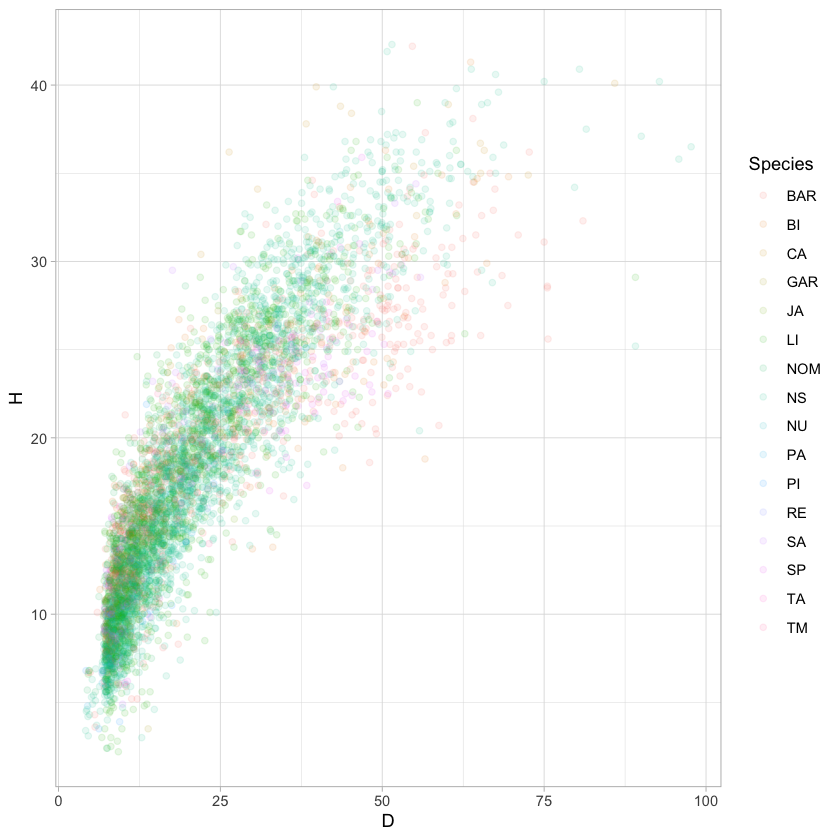

In [80]:
# Let's have a look at them

ggplot(din, aes(x=D, y=H, color=Species))+geom_point(alpha=0.1)

In [81]:
# I use only some of the species here

data <- subset(din,  Species=='BI' | Species=='NS' | Species=='BAR' | Species=='CA' | Species=='LI'| Species=='NOM' | Species=='SP') 

#for Andres check
#data <- subset(din,  Species=='KS' | Species=='KU' | Species=='HB' | Species=='PN') 

In [82]:
library(nlme)

In [83]:
#make a grouped dataframe

data1 = groupedData(H ~ D | Species, data)

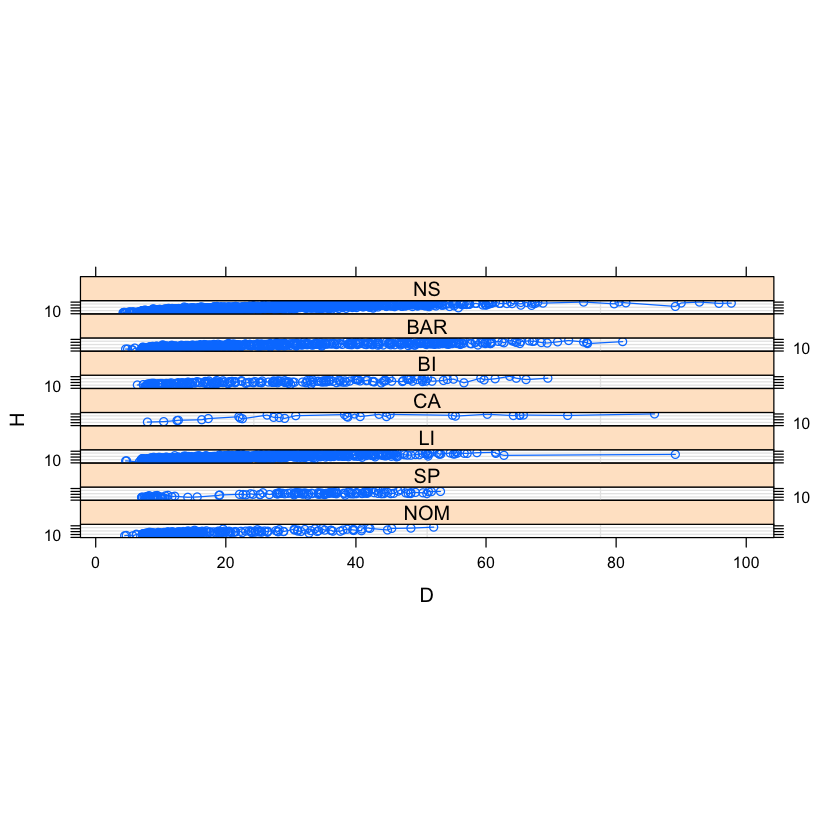

In [84]:
plot(data1)

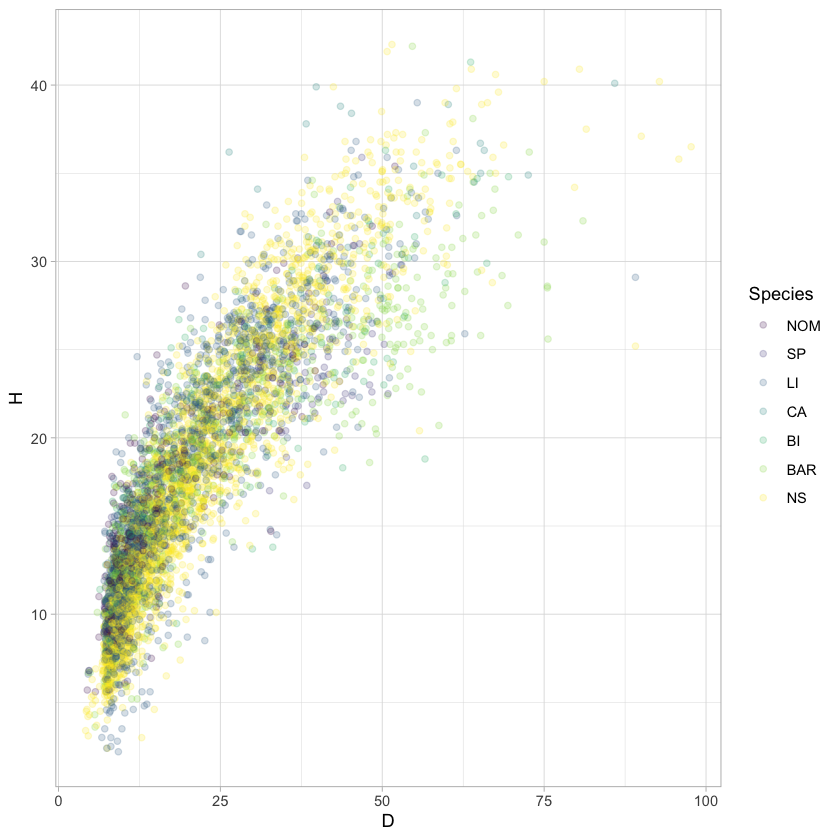

In [85]:
ggplot(data1, aes(x=D, y=H, color=Species))+geom_point(alpha=0.2)

## Chapman model

Here the model 

$$
H = 1.3 + h_{mx} (1 - e^{-k D})^p
$$

with $h_{mx} = a, k = b$ and $p = c$ is defined.

In [86]:
# here I set up a fixed effects model (chapman with fixed intercept)
#
fm1 = nlsList(H ~ 1.3 + a*(1 - exp(-b * D))^c, data=data1, start=list(a=50., b=0.1, c=2.5))

Warning message:
“1 error caught in numericDeriv(form[[3L]], names(ind), env): Missing value or an infinity produced when evaluating the model”

In [87]:
fm1

Call:
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c | Species 
   Data: data1 

Coefficients:
           a          b         c
NOM 42.04818 0.01589228 0.6589712
SP  28.49690 0.04673167 1.0926711
LI  32.97985 0.04325677 1.1160291
CA  35.54281 0.07411242 1.5646678
BI        NA         NA        NA
BAR 30.05655 0.03852353 0.8791804
NS  39.20181 0.03301850 1.1817413

Degrees of freedom: 4971 total; 4953 residual
Residual standard error: 2.901199

In [88]:
# Ok, the Birch problem again! It found parameters for all but Birch.

In [89]:
summary(fm1)

Call:
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c | Species 
   Data: data1 

Coefficients:
   a 
    Estimate Std. Error   t value      Pr(>|t|)
NOM 42.04818 14.1505763  2.971482  8.996856e-04
SP  28.49690  2.2808469 12.494000  3.442303e-27
LI  32.97985  1.0204237 32.319756 9.183711e-140
CA  35.54281  1.1840573 30.017811  2.688556e-21
BI        NA         NA        NA            NA
BAR 30.05655  0.8532944 35.224131 1.359110e-166
NS  39.20181  0.8839484 44.348533  0.000000e+00
   b 
      Estimate  Std. Error   t value     Pr(>|t|)
NOM 0.01589228 0.013218903  1.202239 1.759436e-01
SP  0.04673167 0.013062765  3.577472 2.008136e-04
LI  0.04325677 0.003938442 10.983217 7.714593e-22
CA  0.07411242 0.016925033  4.378864 6.428027e-04
BI          NA          NA        NA           NA
BAR 0.03852353 0.004437591  8.681181 4.287207e-18
NS  0.03301850 0.001846673 17.879993 6.958266e-73
   c 
     Estimate Std. Error   t value      Pr(>|t|)
NOM 0.6589712 0.09455515  6.969173  6.262457e-14
SP  1.092

In [90]:
# This is the summary for the fixed effect model. We can see that we do not get the 
# Birch parameters estimated. In the rest, we get good results. 

In [91]:
# now I set up a nonlinear mixed model with a fixed part and a random part.
# the random part is in this case the exponent which is allowed to be influenced by the 
# species. 

model1a=nlme(fm1,data1, fixed=list(a~1,b~1,c~1), random=a~1|Species)
model1b=nlme(fm1,data1, fixed=list(a~1,b~1,c~1), random=b~1|Species)
model1c=nlme(fm1,data1, fixed=list(a~1,b~1,c~1), random=c~1|Species)

Warning message in nlme.nlsList(fm1, data1, fixed = list(a ~ 1, b ~ 1, c ~ 1), random = a ~ :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”Warning message in nlme.nlsList(fm1, data1, fixed = list(a ~ 1, b ~ 1, c ~ 1), random = b ~ :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”Warning message in nlme.nlsList(fm1, data1, fixed = list(a ~ 1, b ~ 1, c ~ 1), random = c ~ :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”

### The output of models not show in the Article is supressed

In [92]:
model1a
#model1b
#model1c

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
  Data: data1 
  Log-likelihood: -13252.73
  Fixed: list(a ~ 1, b ~ 1, c ~ 1) 
         a          b          c 
36.2671779  0.0341138  1.0273890 

Random effects:
 Formula: a ~ 1 | Species
               a Residual
StdDev: 2.937307 3.088152

Number of Observations: 5198
Number of Groups: 7 

In [93]:
summary(model1a)
#summary(model1b)
#summary(model1c)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
 Data: data1 
       AIC      BIC    logLik
  26515.46 26548.24 -13252.73

Random effects:
 Formula: a ~ 1 | Species
               a Residual
StdDev: 2.937307 3.088152

Fixed effects: list(a ~ 1, b ~ 1, c ~ 1) 
     Value Std.Error   DF  t-value p-value
a 36.26718 1.2615071 5189 28.74909       0
b  0.03411 0.0016113 5189 21.17191       0
c  1.02739 0.0236981 5189 43.35331       0
 Correlation: 
  a      b     
b -0.446       
c -0.390  0.949

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-4.08848792 -0.63079599 -0.02331395  0.63931464  3.97875929 

Number of Observations: 5198
Number of Groups: 7 

In [94]:
# Here the summary of the mixed model with paramter c as random to the species.
# The general model get all parameters estimated.

In [95]:
# now setting up the nlme for one fixed and two random parameters

model2ab=nlme(fm1,data1, fixed=a + b + c ~ 1, random=pdDiag(a + b ~1), groups= ~ Species)
model2ac=nlme(fm1,data1, fixed=a + b + c ~ 1, random=pdDiag(a + c ~1), groups= ~ Species)
model2bc=nlme(fm1,data1, fixed=a + b + c ~ 1, random=pdDiag(b + c ~1), groups= ~ Species)

Warning message in nlme.nlsList(fm1, data1, fixed = a + b + c ~ 1, random = pdDiag(a + :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”Warning message in nlme.nlsList(fm1, data1, fixed = a + b + c ~ 1, random = pdDiag(a + :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”Warning message in nlme.nlsList(fm1, data1, fixed = a + b + c ~ 1, random = pdDiag(b + :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”

In [96]:
#model2ab
model2ac
#model2bc

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
  Data: data1 
  Log-likelihood: -12981.49
  Fixed: list(a ~ 1, b ~ 1, c ~ 1) 
          a           b           c 
33.89522803  0.03485677  0.90017483 

Random effects:
 Formula: list(a ~ 1, c ~ 1)
 Level: Species
 Structure: Diagonal
               a         c Residual
StdDev: 3.505413 0.1594091  2.92263

Number of Observations: 5198
Number of Groups: 7 

In [97]:
#summary(model2ab)
summary(model2ac)
#summary(model2bc)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
 Data: data1 
       AIC      BIC    logLik
  25974.98 26014.31 -12981.49

Random effects:
 Formula: list(a ~ 1, c ~ 1)
 Level: Species
 Structure: Diagonal
               a         c Residual
StdDev: 3.505413 0.1594091  2.92263

Fixed effects: list(a ~ 1, b ~ 1, c ~ 1) 
     Value Std.Error   DF  t-value p-value
a 33.89523 1.4134909 5189 23.97980       0
b  0.03486 0.0015205 5189 22.92391       0
c  0.90017 0.0644698 5189 13.96274       0
 Correlation: 
  a      b     
b -0.305       
c -0.061  0.288

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-4.345024856 -0.593253330  0.001042211  0.605031652  4.779921242 

Number of Observations: 5198
Number of Groups: 7 

In [98]:
# now setting up the nlme for three random parameters

model3=nlme(fm1,data1, fixed=a + b + c ~ 1, random=pdDiag(a + b + c ~1), groups= ~ Species)

Warning message in nlme.nlsList(fm1, data1, fixed = a + b + c ~ 1, random = pdDiag(a + :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”

In [99]:
model3

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
  Data: data1 
  Log-likelihood: -12980.42
  Fixed: list(a ~ 1, b ~ 1, c ~ 1) 
          a           b           c 
34.04586951  0.03498801  0.91098301 

Random effects:
 Formula: list(a ~ 1, b ~ 1, c ~ 1)
 Level: Species
 Structure: Diagonal
               a           b         c Residual
StdDev: 3.236853 0.007147122 0.1799653 2.919516

Number of Observations: 5198
Number of Groups: 7 

In [100]:
summary(model3)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + a * (1 - exp(-b * D))^c 
 Data: data1 
       AIC      BIC    logLik
  25974.84 26020.73 -12980.42

Random effects:
 Formula: list(a ~ 1, b ~ 1, c ~ 1)
 Level: Species
 Structure: Diagonal
               a           b         c Residual
StdDev: 3.236853 0.007147122 0.1799653 2.919516

Fixed effects: list(a ~ 1, b ~ 1, c ~ 1) 
     Value Std.Error   DF   t-value p-value
a 34.04587 1.4301695 5189 23.805478       0
b  0.03499 0.0036791 5189  9.509894       0
c  0.91098 0.0753268 5189 12.093751       0
 Correlation: 
  a      b     
b -0.326       
c -0.156  0.258

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-4.387106043 -0.596989257 -0.004323441  0.602971261  4.800326086 

Number of Observations: 5198
Number of Groups: 7 

In [101]:
# Here the summary of the mixed model with paramter b and c as random to the species.
# The general model get all parameters estimated.

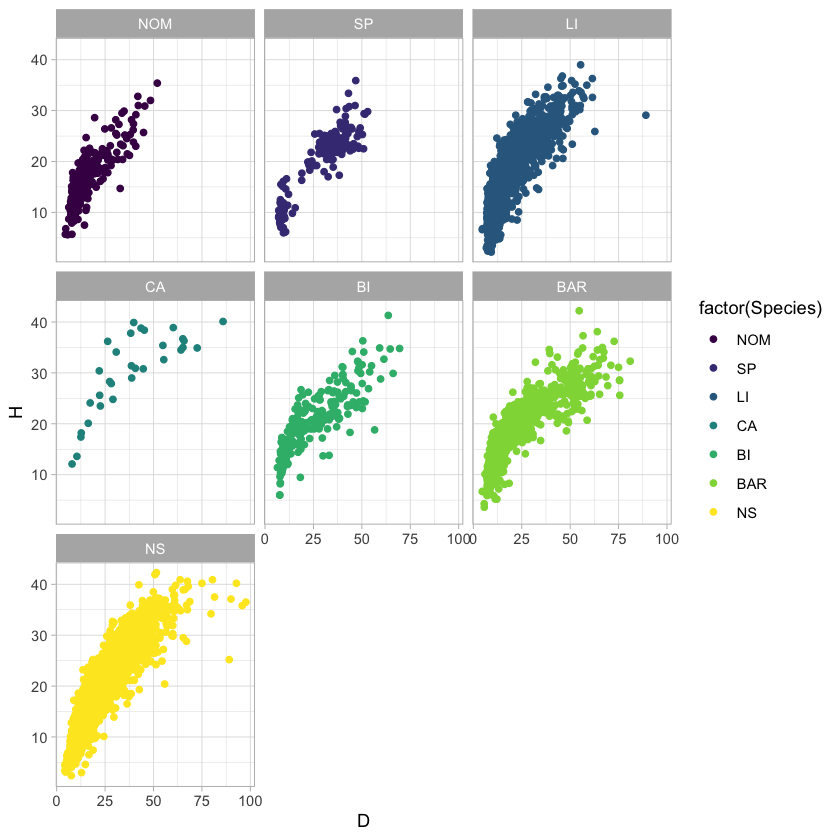

In [102]:
# Visualisation of the data used in the fitting
#
ggplot(data1, aes(x = D, y = H, color = factor(Species))) +
  geom_point() +
  facet_wrap(~ Species)

In [103]:
# retrieve the coefficients of the model
#
coef(model1a)
#coef(model1b)
#coef(model1c)

,a,b,c
NOM,37.78628,0.0341138,1.027389
SP,32.54798,0.0341138,1.027389
LI,36.41901,0.0341138,1.027389
CA,42.30778,0.0341138,1.027389
BI,35.38756,0.0341138,1.027389
BAR,34.01815,0.0341138,1.027389
NS,35.40348,0.0341138,1.027389


In [104]:
mean(coef(model1a)$a)


[1] 36.26718

In [105]:
# retrieve the coefficients of the model
#
#coef(model2ab)
coef(model2ac)
#coef(model2bc)

,a,b,c
NOM,31.72749,0.03485677,0.8093733
SP,31.17310,0.03485677,0.9465480
LI,35.45789,0.03485677,1.0034857
CA,39.21520,0.03485677,0.7698728
BI,30.53011,0.03485677,0.7242918
BAR,30.81686,0.03485677,0.8366129
NS,38.34595,0.03485677,1.2110394


In [106]:
# retrieve the coefficients of the model
#
coef(model3)

,a,b,c
NOM,32.92341,0.03110886,0.7775879
SP,31.37242,0.03431515,0.9431223
LI,33.70830,0.04042462,1.0762828
CA,37.73202,0.04387076,0.8984492
BI,33.15036,0.02512694,0.6371453
BAR,30.43598,0.03671194,0.8588460
NS,38.99860,0.03335777,1.1854476


In [107]:
# The nmle fitting gave us also parameter estimates for the
# Birch stand! 

In [108]:
# make a new dataframe
#
data2 <- data1

In [109]:
# add the model predictions to the new dataframe
#
data2$preda <-predict(model1a)
data2$predb <-predict(model1b)
data2$predc <-predict(model1c)
data2$pred2ab <- predict(model2ab)
data2$pred2ac <- predict(model2ac)
data2$pred2bc <- predict(model2bc)
data2$pred3 <- predict(model3)
head(data2)

H,HV,HKO,Species,D,ER,PIND,MOODETUD_P,KKT,DBH,H_VALEM,V,S,preda,predb,predc,pred2ab,pred2ac,pred2bc,pred3
8.2,2.6,0.0,BI,7.85,10,0.64010,0.64010,JO,7.85,10.694,0.02270,1.2016,9.290381,9.595038,10.58420,11.04301,12.13954,12.63001,12.37810
18.9,5.9,3.3,NS,20.20,7,1.36565,0.09597,MO,20.20,19.916,0.31732,8.0531,18.596466,18.353389,18.14520,18.00049,18.08271,18.11575,18.05140
26.1,14.7,9.2,NS,30.25,10,0.64010,0.64010,JO,30.25,23.294,0.90391,15.8536,23.815402,23.558002,23.48737,23.94020,24.12690,24.13895,24.08278
10.9,4.9,0.5,NS,11.40,10,0.64010,0.64010,JO,11.40,14.352,0.06580,2.7994,12.358449,12.146085,11.72694,11.41897,11.23765,11.23355,11.26530
16.8,4.6,1.0,NS,23.25,10,0.64010,0.64010,JO,23.25,21.161,0.37236,8.1901,20.369112,20.120610,19.96933,19.96979,20.10874,20.14233,20.06697
25.8,12.8,9.1,NS,35.55,10,0.64010,0.64010,JO,35.55,24.464,1.19892,18.0354,25.935905,25.673066,25.62024,26.48961,26.64330,26.62209,26.61478


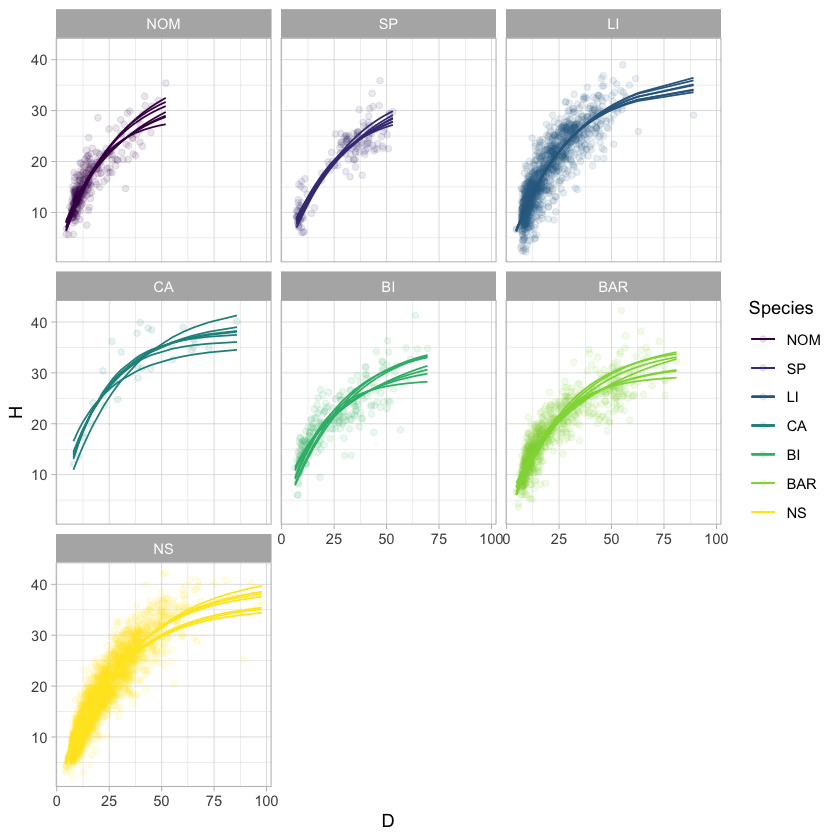

In [110]:
# plot the predicted models over the data
#
ggplot(data2, aes(x=D, y=H, color=Species))+geom_point(alpha=0.1)+geom_line(aes(y=preda))+geom_line(aes(y=predb))+geom_line(aes(y=predc))+geom_line(aes(y=pred2ab))+geom_line(aes(y=pred2ac))+geom_line(aes(y=pred2bc))+geom_line(aes(y=pred3))+facet_wrap(~Species)

In [111]:
fun.1a <- function(x) 1.3 + summary(model1a)$tTable[1,1] * (1 - exp(-summary(model1a)$tTable[2,1] * x))^summary(model1a)$tTable[3,1]
fun.1b <- function(x) 1.3 + summary(model1b)$tTable[1,1] * (1 - exp(-summary(model1b)$tTable[2,1] * x))^summary(model1b)$tTable[3,1]
fun.1c <- function(x) 1.3 + summary(model1c)$tTable[1,1] * (1 - exp(-summary(model1c)$tTable[2,1] * x))^summary(model1c)$tTable[3,1]

fun.2ab <- function(x) 1.3 + summary(model2ab)$tTable[1,1] * (1 - exp(-summary(model2ab)$tTable[2,1] * x))^summary(model2ab)$tTable[3,1]
fun.2ac <- function(x) 1.3 + summary(model2ac)$tTable[1,1] * (1 - exp(-summary(model2ac)$tTable[2,1] * x))^summary(model2ac)$tTable[3,1]
fun.2bc <- function(x) 1.3 + summary(model2bc)$tTable[1,1] * (1 - exp(-summary(model2bc)$tTable[2,1] * x))^summary(model2bc)$tTable[3,1]

fun.3 <- function(x) 1.3 + summary(model3)$tTable[1,1] * (1 - exp(-summary(model3)$tTable[2,1] * x))^summary(model3)$tTable[3,1]

In [112]:
# function to place a common legend for ggplots arranged in a grid

library(ggplot2)
library(gridExtra)
library(grid)

grid_arrange_shared_legend <- function(..., nrow = 1, ncol = length(list(...)), position = c("bottom", "right")) {

  plots <- list(...)
  position <- match.arg(position)
  g <- ggplotGrob(plots[[1]] + theme(legend.position = position))$grobs
  legend <- g[[which(sapply(g, function(x) x$name) == "guide-box")]]
  lheight <- sum(legend$height)
  lwidth <- sum(legend$width)
  gl <- lapply(plots, function(x) x + theme(legend.position = "none"))
  gl <- c(gl, nrow = nrow, ncol = ncol)

  combined <- switch(position,
                     "bottom" = arrangeGrob(do.call(arrangeGrob, gl),
                                            legend,
                                            ncol = 1,
                                            heights = unit.c(unit(1, "npc") - lheight, lheight)),
                     "right" = arrangeGrob(do.call(arrangeGrob, gl),
                                           legend,
                                           ncol = 2,
                                           widths = unit.c(unit(1, "npc") - lwidth, lwidth)))
  grid.newpage()
  grid.draw(combined)

}

In [113]:
df1 <- data2[, c("Species","H","preda")]
df1$resid <- residuals(model1a)
df1$residP <- residuals(model1a, type="pearson")
#head(df1)

In [114]:
df1a <- data2[, c("Species","H","preda")]
df1a$resid <- residuals(model1a)
df1a$residP <- residuals(model1a, type="pearson")
#head(df1a)

df1b <- data2[, c("Species","H","predb")]
df1b$resid <- residuals(model1b)
df1b$residP <- residuals(model1b, type="pearson")
#head(df1b)

df1c <- data2[, c("Species","H","predc")]
df1c$resid <- residuals(model1c)
df1c$residP <- residuals(model1c, type="pearson")
#head(df1c)

df2ab <- data2[, c("Species","H","pred2ab")]
df2ab$resid <- residuals(model2ab)
df2ab$residP <- residuals(model2ab, type="pearson")
#head(df2ab)

df2ac <- data2[, c("Species","H","pred2ac")]
df2ac$resid <- residuals(model2ac)
df2ac$residP <- residuals(model2ac, type="pearson")
#head(df2ac)

df2bc <- data2[, c("Species","H","pred2bc")]
df2bc$resid <- residuals(model2bc)
df2bc$residP <- residuals(model2bc, type="pearson")
#head(df2bc)

df3 <- data2[, c("Species","H","pred3")]
df3$resid <- residuals(model3)
df3$residP <- residuals(model3, type="pearson")
#head(df3)

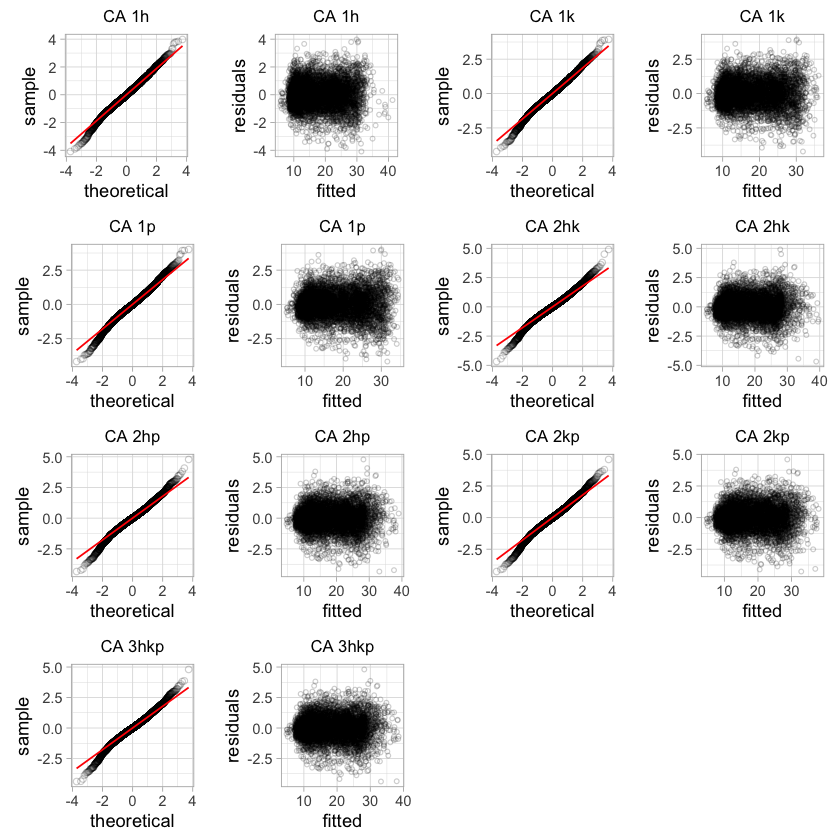

In [115]:
library(gridExtra) 
#pdf("ja_cha_qqfit.pdf")
theme_set(
  theme_light() # + theme(legend.position = "top")
  )
theme_update(plot.title = element_text(hjust = 0.5, size=10))

g = grid.arrange(
ggplot(df1a, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 1h") + theme(aspect.ratio=1),
ggplot(df1a, aes(preda,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 1h") + theme(aspect.ratio=1),    

ggplot(df1b, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 1k") + theme(aspect.ratio=1),
ggplot(df1b, aes(predb,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 1k") + theme(aspect.ratio=1),   

ggplot(df1c, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 1p") + theme(aspect.ratio=1),
ggplot(df1c, aes(predc,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 1p") + theme(aspect.ratio=1),  

ggplot(df2ab, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 2hk") + theme(aspect.ratio=1),
ggplot(df2ab, aes(pred2ab,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 2hk") + theme(aspect.ratio=1),  

ggplot(df2ac, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 2hp") + theme(aspect.ratio=1),
ggplot(df2ac, aes(pred2ac,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 2hp") + theme(aspect.ratio=1),  
    
ggplot(df2bc, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 2kp") + theme(aspect.ratio=1),
ggplot(df2bc, aes(pred2bc,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 2kp") + theme(aspect.ratio=1),  

ggplot(df3, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 3hkp") + theme(aspect.ratio=1),
ggplot(df3, aes(pred3,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 3hkp") + theme(aspect.ratio=1), 
    
nrow=4,ncol=4)
#dev.off()

In [116]:
# Create plots for article 

In [117]:
plca1a <- ggplot(data2, aes(x=D, y=H, color=Species))+geom_point(alpha=0.3)+ geom_line(aes(y=preda))+annotate("text", x = 80, y = 10, label = "CA 1h")+ stat_function(geom="line", fun = fun.1a, colour="red") + xlim(0,100) + theme(aspect.ratio=1)+ labs(x="Tree diameter at 1.3 m (cm)", y = "Tree height (m)") + theme(text = element_text(size=10))

plca2ac <- ggplot(data2, aes(x=D, y=H, color=Species))+geom_point(alpha=0.3)+ geom_line(aes(y=pred2ac))+annotate("text", x = 80, y = 10, label = "CA 2hp")+ stat_function(geom="line", fun = fun.2ac, colour="red") + xlim(0,100) + theme(aspect.ratio=1)+ labs(x="Tree diameter at 1.3 m (cm)", y = "Tree height (m)") + theme(text = element_text(size=10))

plca3abc <- ggplot(data2, aes(x=D, y=H, color=Species))+geom_point(alpha=0.3)+ geom_line(aes(y=pred3))+annotate("text", x = 80, y = 10, label = "CA 3hkp")+ stat_function(geom="line", fun = fun.3, colour="red") + xlim(0,100) + theme(aspect.ratio=1)+ labs(x="Tree diameter at 1.3 m (cm)", y = "Tree height (m)") + theme(text = element_text(size=10))

plca1aqq <- ggplot(df1a, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 1h") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))

plca1are <- ggplot(df1a, aes(preda,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 1h") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))    

plca2acqq <- ggplot(df2ac, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 2hp") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))

plca2acre <- ggplot(df2ac, aes(pred2ac,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 2hp") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))  

plca3abcqq <- ggplot(df3, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("CA 3hkp") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))

plca3abcre <- ggplot(df3, aes(pred3,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("CA 3hkp") + theme(aspect.ratio=1)+ theme(text = element_text(size=10)) 
    



## Näslund model

here the model 

$$
H = 1.3 + (\frac{D}{a + b D}) \quad \textrm{with} \quad b = \sqrt[3]{\frac{1}{h_{mx} - 1.3}}
$$

is defined. The rescaling for $b$ let the height parameter be comparable to the Chapman's model.

In [118]:
###############################################################################################################
#
# Here starts the Näslund modeling part with reparameterised model 
# 
###############################################################################################################

In [119]:
# Reparameterisation for b

# b := (1/(hmx - 1.3))^(1/3) 

In [120]:
# here I set up a fixed effects model (chapman with free intercept)
#
fm2 = nlsList(H ~ 1.3 + (D / (a + (1/(b - 1.3))^(1/3) * D))^3, data=data1, start=list(a=1., b=40.))

In [121]:
fm2

Call:
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 | Species 
   Data: data1 

Coefficients:
           a        b
NOM 1.247373 33.31601
SP  1.590007 35.26430
LI  1.693137 40.41405
CA  1.295229 45.32164
BI  1.182884 33.47144
BAR 1.435325 34.94654
NS  2.170269 47.11181

Degrees of freedom: 5198 total; 5184 residual
Residual standard error: 2.954821

In [122]:
summary(fm2)

Call:
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 | Species 
   Data: data1 

Coefficients:
   a 
    Estimate Std. Error   t value      Pr(>|t|)
NOM 1.247373 0.04890166 25.507784  1.050070e-89
SP  1.590007 0.09473199 16.784269  9.504735e-40
LI  1.693137 0.02799401 60.482129  0.000000e+00
CA  1.295229 0.13136891  9.859476  1.537181e-09
BI  1.182884 0.05317700 22.244283  2.378547e-50
BAR 1.435325 0.03004014 47.780243 1.952943e-240
NS  2.170269 0.02251738 96.381972  0.000000e+00
   b 
    Estimate Std. Error   t value      Pr(>|t|)
NOM 33.31601  0.9503496  35.05658 2.115842e-123
SP  35.26430  1.0525782  33.50279  2.547323e-76
LI  40.41405  0.5015511  80.57813  0.000000e+00
CA  45.32164  1.7748661  25.53525  7.105802e-20
BI  33.47144  0.7063698  47.38515 1.223899e-107
BAR 34.94654  0.4223765  82.73789  0.000000e+00
NS  47.11181  0.4245826 110.96029  0.000000e+00

Residual standard error: 2.954821 on 5184 degrees of freedom


### The output for the models not shown in the article is supressed

In [123]:
nmodel1a=nlme(fm2,data1, fixed=list(a~1,b~1,c~1), random=a~1|Species)
nmodel1b=nlme(fm2,data1, fixed=list(a~1,b~1,c~1), random=b~1|Species)

Warning message in nlme.nlsList(fm2, data1, fixed = list(a ~ 1, b ~ 1, c ~ 1), random = a ~ :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”Warning message in nlme.nlsList(fm2, data1, fixed = list(a ~ 1, b ~ 1, c ~ 1), random = b ~ :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”

In [124]:
#nmodel1a
nmodel1b

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 
  Data: data1 
  Log-likelihood: -13327.09
  Fixed: list(a ~ 1, b ~ 1) 
        a         b 
 1.794178 42.089730 

Random effects:
 Formula: b ~ 1 | Species
              b Residual
StdDev: 3.98609  3.13276

Number of Observations: 5198
Number of Groups: 7 

In [125]:
#summary(nmodel1a)
summary(nmodel1b)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 
 Data: data1 
       AIC     BIC    logLik
  26662.17 26688.4 -13327.09

Random effects:
 Formula: b ~ 1 | Species
              b Residual
StdDev: 3.98609  3.13276

Fixed effects: list(a ~ 1, b ~ 1) 
     Value Std.Error   DF   t-value p-value
a  1.79418 0.0147576 5190 121.57628       0
b 42.08973 1.5374442 5190  27.37643       0
 Correlation: 
  a   
b 0.14

Standardized Within-Group Residuals:
         Min           Q1          Med           Q3          Max 
-4.004205338 -0.607946015  0.003770455  0.648995690  4.217191194 

Number of Observations: 5198
Number of Groups: 7 

In [126]:
nmodel2ab=nlme(fm2,data1, fixed=a + b + c ~ 1, random=pdDiag(a + b ~1), groups= ~ Species)

Warning message in nlme.nlsList(fm2, data1, fixed = a + b + c ~ 1, random = pdDiag(a + :
“'nlme.nlsList' will redefine 'fixed', 'data', and 'start'”

In [127]:
nmodel2ab

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 
  Data: data1 
  Log-likelihood: -13039.66
  Fixed: list(a ~ 1, b ~ 1) 
        a         b 
 1.519221 38.572899 

Random effects:
 Formula: list(a ~ 1, b ~ 1)
 Level: Species
 Structure: Diagonal
                a        b Residual
StdDev: 0.3183463 5.263839 2.954771

Number of Observations: 5198
Number of Groups: 7 

In [128]:
summary(nmodel2ab)

Nonlinear mixed-effects model fit by maximum likelihood
  Model: H ~ 1.3 + (D/(a + (1/(b - 1.3))^(1/3) * D))^3 
 Data: data1 
       AIC      BIC    logLik
  26089.33 26122.11 -13039.66

Random effects:
 Formula: list(a ~ 1, b ~ 1)
 Level: Species
 Structure: Diagonal
                a        b Residual
StdDev: 0.3183463 5.263839 2.954771

Fixed effects: list(a ~ 1, b ~ 1) 
     Value Std.Error   DF  t-value p-value
a  1.51922 0.1229422 5190 12.35719       0
b 38.57290 2.0196209 5190 19.09908       0
 Correlation: 
  a   
b 0.03

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-4.27133378 -0.57599162  0.02653194  0.62019262  4.91691260 

Number of Observations: 5198
Number of Groups: 7 

In [129]:
#coef(nmodel1a)
coef(nmodel1b)

,a,b
NOM,1.794178,43.56367
SP,1.794178,37.41829
LI,1.794178,42.04915
CA,1.794178,50.66627
BI,1.794178,40.70478
BAR,1.794178,39.19574
NS,1.794178,41.03021


In [130]:
coef(nmodel2ab)

,a,b
NOM,1.261599,33.59744
SP,1.593942,35.33005
LI,1.690931,40.37543
CA,1.287952,45.05771
BI,1.198504,33.67357
BAR,1.437492,34.97905
NS,2.164125,46.99706


In [131]:
data2n <- data1

In [132]:
# add the model predictions to the new dataframe
#
data2n$preda <-predict(nmodel1a)
data2n$predb <-predict(nmodel1b)
data2n$pred2ab <- predict(nmodel2ab)
head(data2n)

H,HV,HKO,Species,D,ER,PIND,MOODETUD_P,KKT,DBH,H_VALEM,V,S,preda,predb,pred2ab
8.2,2.6,0.0,BI,7.85,10,0.64010,0.64010,JO,7.85,10.694,0.02270,1.2016,9.099067,8.313418,11.15402
18.9,5.9,3.3,NS,20.20,7,1.36565,0.09597,MO,20.20,19.916,0.31732,8.0531,18.766483,19.256003,18.57421
26.1,14.7,9.2,NS,30.25,10,0.64010,0.64010,JO,30.25,23.294,0.90391,15.8536,23.682177,24.155419,24.37575
10.9,4.9,0.5,NS,11.40,10,0.64010,0.64010,JO,11.40,14.352,0.06580,2.7994,11.814323,12.241362,10.95993
16.8,4.6,1.0,NS,23.25,10,0.64010,0.64010,JO,23.25,21.161,0.37236,8.1901,20.516435,21.005226,20.60253
25.8,12.8,9.1,NS,35.55,10,0.64010,0.64010,JO,35.55,24.464,1.19892,18.0354,25.509597,25.966140,26.61229


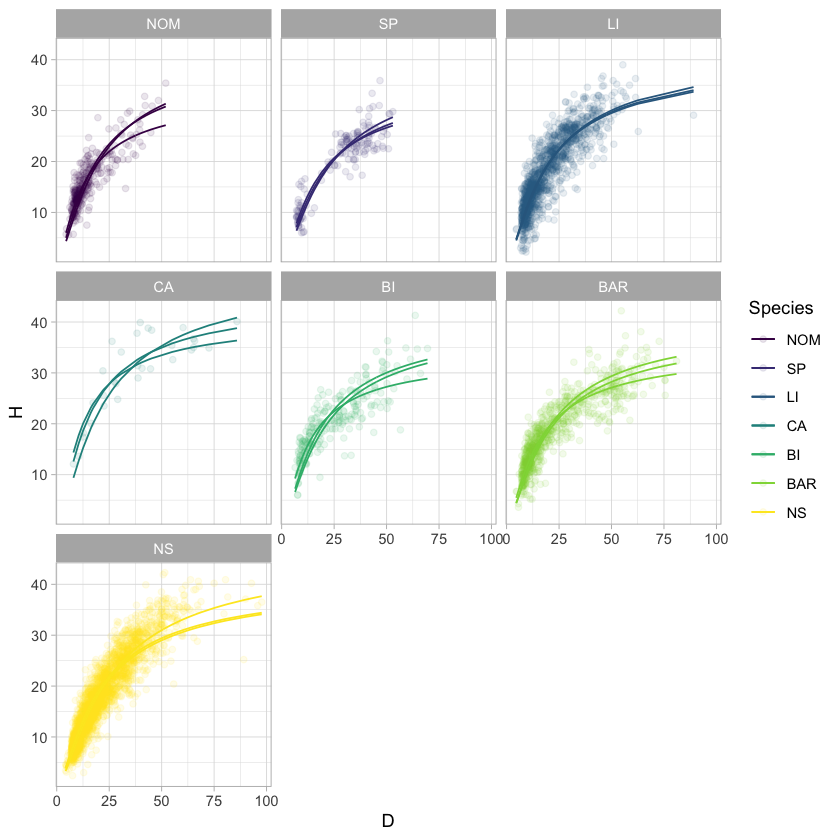

In [133]:
# plot the predicted models over the data
#
ggplot(data2n, aes(x=D, y=H, color=Species))+geom_point(alpha=0.1)+geom_line(aes(y=preda))+geom_line(aes(y=predb))+geom_line(aes(y=pred2ab))+facet_wrap(~Species)

In [134]:
nfun.1a <- function(x) 1.3 + (x / (summary(nmodel1a)$tTable[1,1] + (1/(summary(nmodel1a)$tTable[2,1] - 1.3))^(1/3) * x))^3
nfun.1b <- function(x) 1.3 + (x / (summary(nmodel1b)$tTable[1,1] + (1/(summary(nmodel1b)$tTable[2,1] - 1.3))^(1/3) * x))^3

nfun.2ab <- function(x) 1.3 + (x / (summary(nmodel2ab)$tTable[1,1] + (1/(summary(nmodel2ab)$tTable[2,1] - 1.3))^(1/3) * x))^3


In [135]:
ndf1a <- data2n[, c("Species","H","preda")]
ndf1a$resid <- residuals(nmodel1a)
ndf1a$residP <- residuals(nmodel1a, type="pearson")
head(ndf1a)

ndf1b <- data2n[, c("Species","H","predb")]
ndf1b$resid <- residuals(nmodel1b)
ndf1b$residP <- residuals(nmodel1b, type="pearson")
head(ndf1b)

ndf2ab <- data2n[, c("Species","H","pred2ab")]
ndf2ab$resid <- residuals(nmodel2ab)
ndf2ab$residP <- residuals(nmodel2ab, type="pearson")
head(ndf2ab)


Species,H,preda,resid,residP
BI,8.2,9.099067,-0.8990673,-0.28908704
NS,18.9,18.766483,0.1335169,0.04293117
NS,26.1,23.682177,2.4178230,0.77742933
NS,10.9,11.814323,-0.9143233,-0.29399247
NS,16.8,20.516435,-3.7164349,-1.19498634
NS,25.8,25.509597,0.2904034,0.09337660


Species,H,predb,resid,residP
BI,8.2,8.313418,-0.1134181,-0.03620388
NS,18.9,19.256003,-0.3560027,-0.11363866
NS,26.1,24.155419,1.9445806,0.62072435
NS,10.9,12.241362,-1.3413618,-0.42817248
NS,16.8,21.005226,-4.2052261,-1.34233888
NS,25.8,25.966140,-0.1661396,-0.05303297


Species,H,pred2ab,resid,residP
BI,8.2,11.15402,-2.95402039,-0.99974592
NS,18.9,18.57421,0.32579031,0.11025907
NS,26.1,24.37575,1.72425038,0.58354786
NS,10.9,10.95993,-0.05993324,-0.02028355
NS,16.8,20.60253,-3.80252560,-1.28691036
NS,25.8,26.61229,-0.81229137,-0.27490839


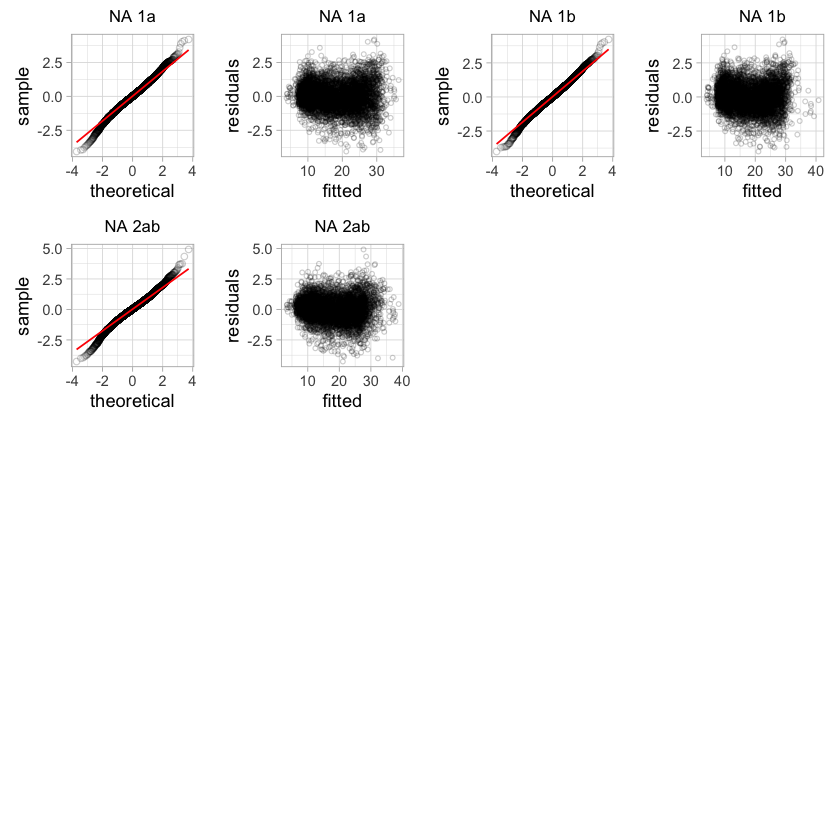

In [136]:
library(gridExtra) 
library(grid)
library(lattice)

#pdf("ja_nas_qqfitrep.pdf")
theme_set(
  theme_light() # + theme(legend.position = "top")
  )
theme_update(plot.title = element_text(hjust = 0.5, size=10))
             
g = grid.arrange(
ggplot(ndf1a, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("NA 1a") + theme(aspect.ratio=1),
ggplot(ndf1a, aes(preda,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("NA 1a") + theme(aspect.ratio=1),    

ggplot(ndf1b, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("NA 1b") + theme(aspect.ratio=1),
ggplot(ndf1b, aes(predb,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("NA 1b") + theme(aspect.ratio=1),   

ggplot(ndf2ab, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("NA 2ab") + theme(aspect.ratio=1),
ggplot(ndf2ab, aes(pred2ab,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("NA 2ab") + theme(aspect.ratio=1), 
    
nrow=4,ncol=4)
#dev.off()

In [137]:
# Create plots for the arcticle

plna1b <- ggplot(data2n, aes(x=D, y=H, color=Species))+geom_point(alpha=0.3)+ geom_line(aes(y=predb))+annotate("text", x = 80, y = 10, label = "NA 1b")+ stat_function(geom="line", fun = fun.1b, colour="red") + xlim(0,100) + theme(aspect.ratio=1) + labs(x="Tree diameter at 1.3 m (cm)", y = "Tree height (m)") + theme(text = element_text(size=10))

plna2ab <- ggplot(data2n, aes(x=D, y=H, color=Species))+geom_point(alpha=0.3)+ geom_line(aes(y=pred2ab))+annotate("text", x = 80, y = 10, label = "NA 2ab")+ stat_function(geom="line", fun = fun.2ab, colour="red") + xlim(0,100) + theme(aspect.ratio=1)+ labs(x="Tree diameter at 1.3 m (cm)", y = "Tree height (m)") + theme(text = element_text(size=10))

plna1bqq <- ggplot(ndf1b, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("NA 1b") + theme(aspect.ratio=1)+ theme(text = element_text(size=10))

plna1bre <- ggplot(ndf1b, aes(predb,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("NA 1b") + theme(aspect.ratio=1)+  theme(text = element_text(size=10))   

plna2abqq <- ggplot(ndf2ab, aes(sample = residP)) + geom_qq(distribution=qnorm, shape=1, alpha=0.2) + geom_qq_line(col="Red") + ggtitle("NA 2ab") + theme(aspect.ratio=1)+  theme(text = element_text(size=10))

plna2abre <- ggplot(ndf2ab, aes(pred2ab,residP)) + geom_point(shape=1, size=1, alpha=0.2) + labs(x ="fitted", y = "residuals") + ggtitle("NA 2ab") + theme(aspect.ratio=1)  + theme(text = element_text(size=10))
 


### Show plots for the article

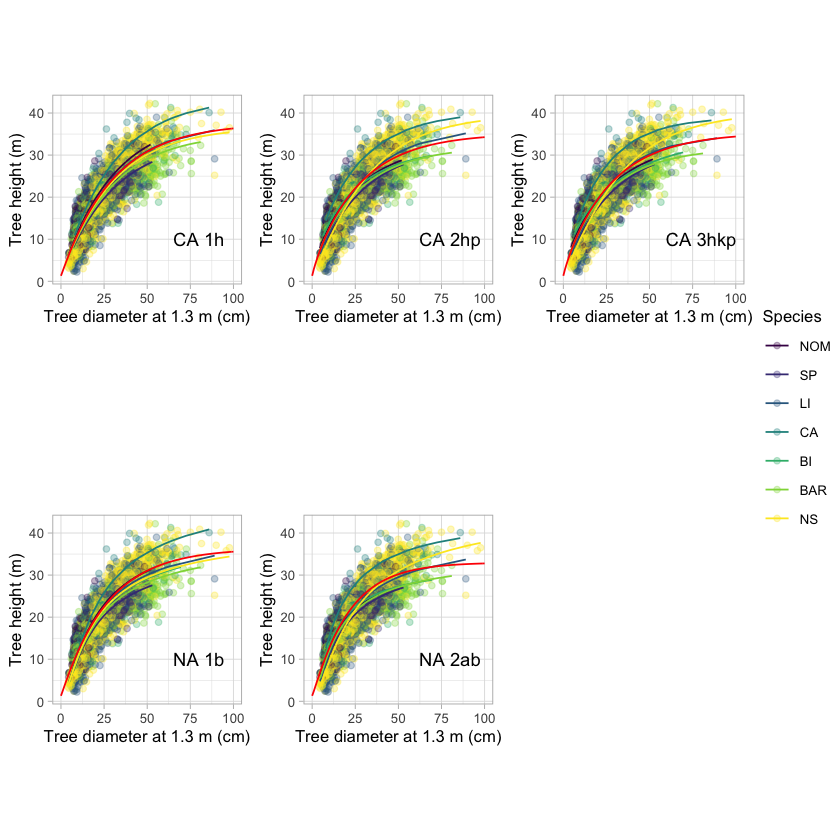

In [138]:
library(gridExtra)
#pdf("fig2.pdf")
g = grid_arrange_shared_legend(plca1a, plca2ac, plca3abc, plna1b, plna2ab,
nrow=2,ncol=3, position="right")
#dev.off()

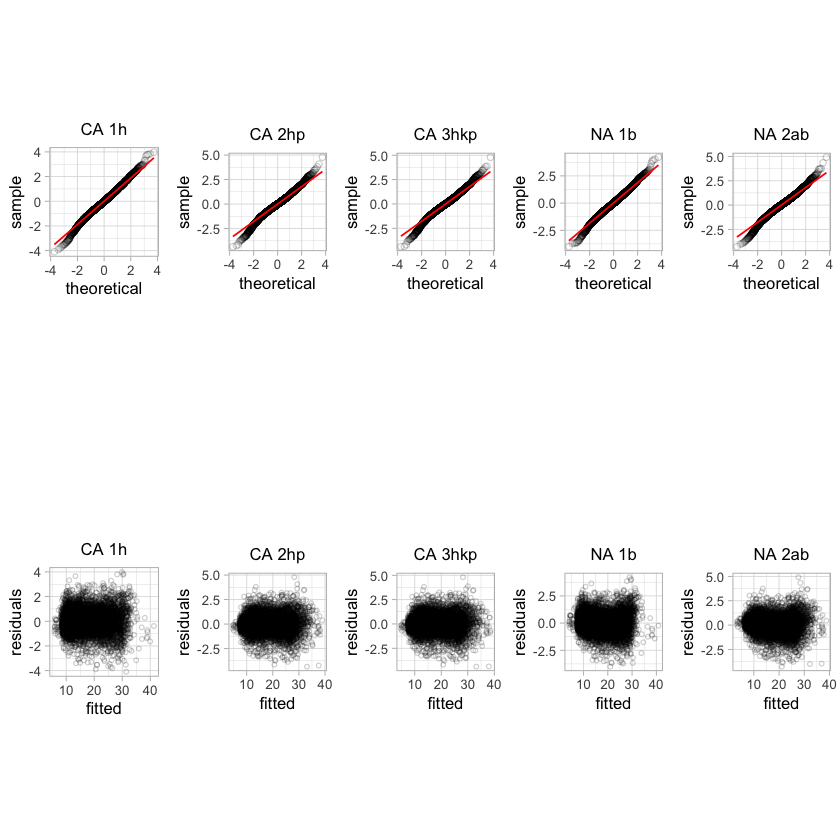

In [139]:
library(gridExtra)
#pdf("fig2aa.pdf")
g = grid.arrange(plca1aqq, plca2acqq, plca3abcqq, plna1bqq, plna2abqq, plca1are, plca2acre, plca3abcre, plna1bre, plna2abre,
nrow=2,ncol=5)
#dev.off()

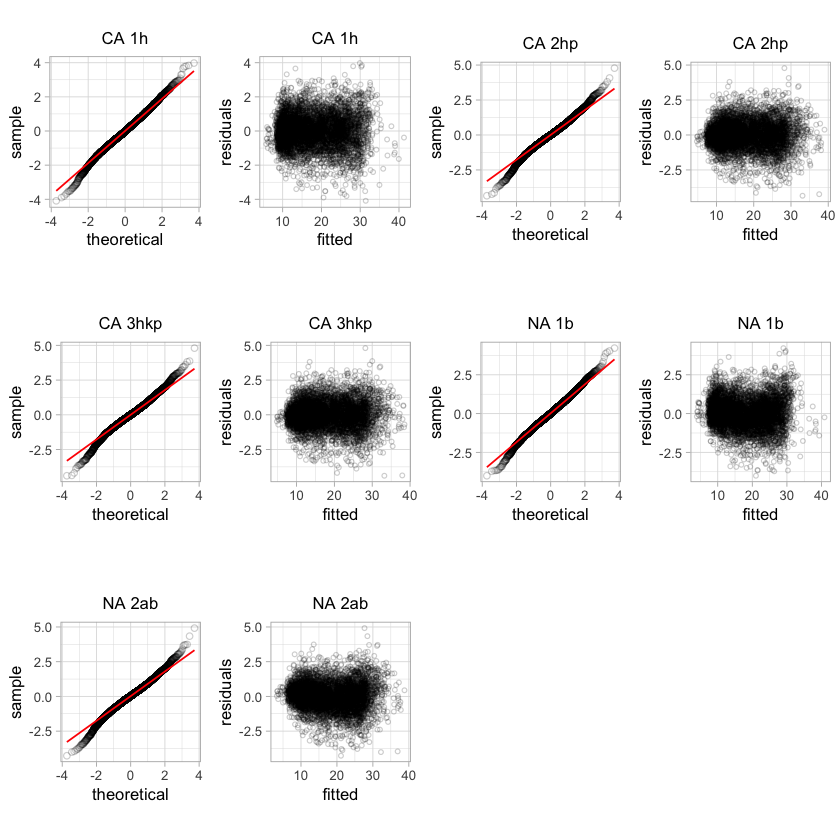

In [140]:
library(gridExtra)
#pdf("fig2aax.pdf")
g = grid.arrange(plca1aqq, plca1are, plca2acqq, plca2acre, plca3abcqq, plca3abcre, plna1bqq, plna1bre, plna2abqq, plna2abre,
nrow=3,ncol=4)
#dev.off()